
***
***

# R2.07
## TP PEI : identification de graphes cycle
***
***

Le but de ce notebook est d'écrire une fonction permettant de déterminer si le graphe $G$ représenté par la matrice d'adjacence $A$ est un cycle $C_n$.
***
***
A few ground rules for your report:
* _your code must be clear, commented and use explicit variable names_
* _every algorithm must be tested on a few examples which show the different use cases_
* _markdown comments and examples must be provided, and the report should be self-contained_

In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#magic
import warnings
warnings.filterwarnings('ignore')

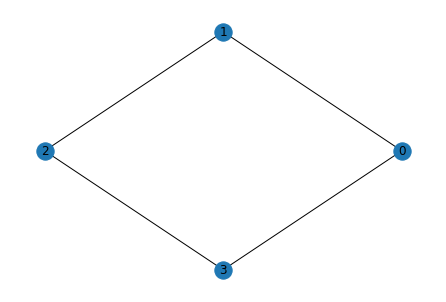

In [12]:
#exemple :

Cund=np.array([[0,1,0,1],
    [1,0,0,0],
    [0,1,0,1],
    [1,0,1,0]]
           )


C4=np.array([[0,1,0,1],
    [1,0,1,0],
    [0,1,0,1],
    [1,0,1,0]]
           )
G=nx.from_numpy_array(C4)


nx.draw(G,with_labels=True,pos=nx.circular_layout(G))

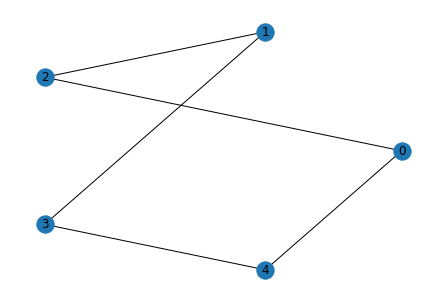

In [6]:

C5mx=np.array([
    [0,0,1,0,1],
    [0,0,1,1,0],
    [1,1,0,0,0],
    [0,1,0,0,1],
    [1,0,0,1,0]]
           )
G=nx.from_numpy_array(C5mx)


nx.draw(G,with_labels=True,pos=nx.circular_layout(G))

In [ ]:
Cncc=np.array([
    [0,0,1,0,1,0],
    [0,0,1,1,0,0],
    [1,1,0,0,0,0],
    [0,1,0,0,1,0],
    [1,0,0,1,0,0],
    [0,0,0,0,0,0]]
           )
G=nx.from_numpy_array(Cncc)


nx.draw(G,with_labels=True,pos=nx.circular_layout(G))

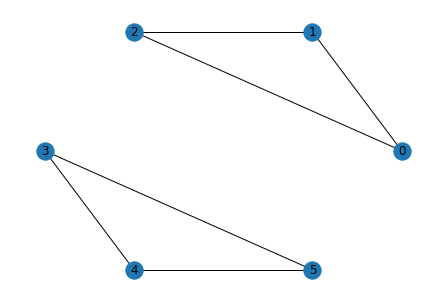

In [21]:


C3x2=np.array([
    [0,1,1,0,0,0],
    [1,0,1,0,0,0],
    [1,1,0,0,0,0],
    [0,0,0,0,1,1],
    [0,0,0,1,0,1],
    [0,0,0,1,1,0]]
           )
G=nx.from_numpy_array(C3x2)


nx.draw(G,with_labels=True,pos=nx.circular_layout(G))

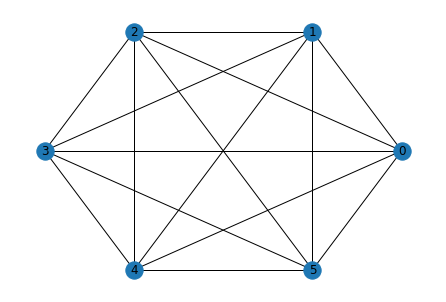

In [9]:

G=nx.generators.complete_graph(6)
K6=nx.to_numpy_array(G)

nx.draw(G,with_labels=True,pos=nx.circular_layout(G))

In [37]:
#tableau des exemples

ex=[Cund,C4,C5mx,Cncc,C3x2,K6]

#trois sous-fonctions : 


#le graphe est-il non-orienté ?
def isUndirected(A):
    n=A.shape[0]    
    undir=True    
    for i in range(n):
        for j in range(n):
            if A[i,j]!=A[j,i]:
                undir=False
    return undir


isUndirected(Cund)

False

In [22]:
#les degrés valent-ils tous 2 ?
def isDeg2(A):
    n=A.shape[0]   
    deg2=True
    for i in range(n):
        #on calcule le degré de chaque sommet
        deg=0
        for j in range(n):
            if A[i,j]==1:
                deg=deg+1
        if deg!=2:
            deg2=False
    return deg2

isDeg2(C3x2)

True

In [39]:
def neighbours(A,i):
    
    
    neigh=[]
    for j in range(A.shape[0]):
        if A[i,j]==1:
            neigh.append(j)
            
    return neigh

#le graphe est-il connexe ?
def isConnected(A):
    #on va implémenter une version simplifiée d'un parcours, 
    #on s'arrêtera si on a visiter une composante connexe en entier
    
    
    n=A.shape[0]   
    connect=True
    visite=[0]
    a_traiter=[0]
    
    while len(a_traiter)>0:
        cur=a_traiter[0]
        
        a_traiter=a_traiter[1:]        
        neigh=neighbours(A,cur)
        for v in neigh:
            if not ( v in visite):
                a_traiter.append(v)
                visite.append(v)
    if len(visite)!=n:
        connect=False
    return connect

isConnected(C4)
isConnected(C3x2)
isConnected(C5mx)

True

In [40]:
###

#fonction principale
def isCycle(A):
    
    return isUndirected(A) and isDeg2(A) and isConnected(A)



for i in ex:
    print(isCycle(i))

False
True
True
False
False
False
